In [30]:
import cmocean 
import cosima_cookbook as cc
import dask.distributed as dsk
import gsw
import matplotlib.gridspec as gs
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import xarray as xr

import warnings # ignore these warnings
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)

figdir = '/home/561/jn8053/g_e14/figures-tmp/easterlies-collaborative/'

clnt = dsk.Client()
clnt

Client Scheduler: tcp://127.0.0.1:41835 Dashboard: /proxy/46643/status,Cluster Workers: 8 Cores: 48 Memory: 188.57 GiB


In [2]:
session_ryf = cc.database.create_session()
experiment_ryf = '01deg_jra55v13_ryf9091'
session_eas = cc.database.create_session('/g/data/v45/akm157/model_data/access-om2/01deg_jra55v13_ryf9091_easterlies_up10/easterlies.db')
experiment_eup = '01deg_jra55v13_ryf9091_easterlies_up10'
experiment_edo = '01deg_jra55v13_ryf9091_easterlies_down10'

ti = '2150-01-01'
tf = '2164-12-31'

In [62]:
ty = {}
ty['ctrl'] = cc.querying.getvar(experiment_ryf, 'ty_trans_rho', session_ryf, start_time = ti, end_time = tf).sel(grid_yu_ocean = slice(None, -50))
ty['up'] = cc.querying.getvar(experiment_eup, 'ty_trans_rho', session_eas, start_time = ti, end_time = tf).sel(grid_yu_ocean = slice(None, -50))
ty['down'] = cc.querying.getvar(experiment_edo, 'ty_trans_rho', session_eas, start_time = ti, end_time = tf).sel(grid_yu_ocean = slice(None, -50))

In [63]:
psi = {}
for k in ['ctrl', 'up', 'down']:
    psi[k] = ty[k]/(1025*1e6)
    psi[k] = psi[k].sum('grid_xt_ocean')

In [64]:
psi_overturning = {}
for k in ['ctrl', 'up', 'down']:
    psi_overturning[k] = psi[k].cumsum('potrho') - psi[k].sum('potrho')

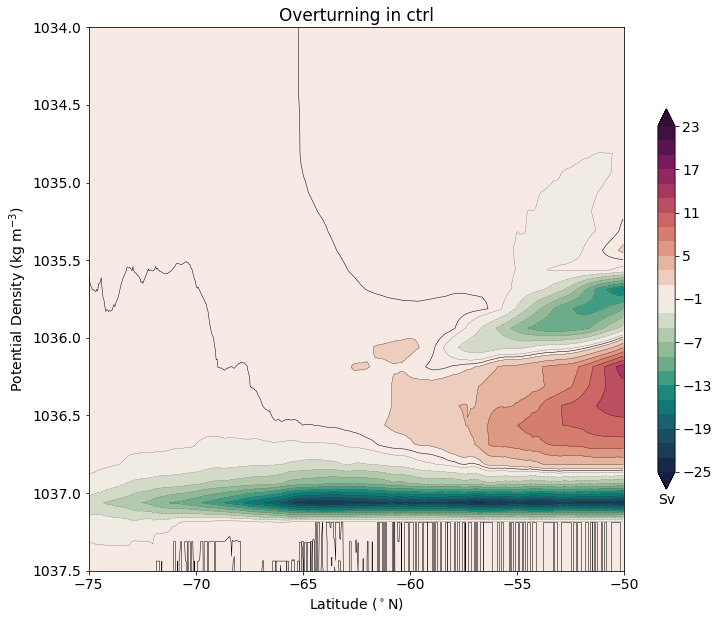

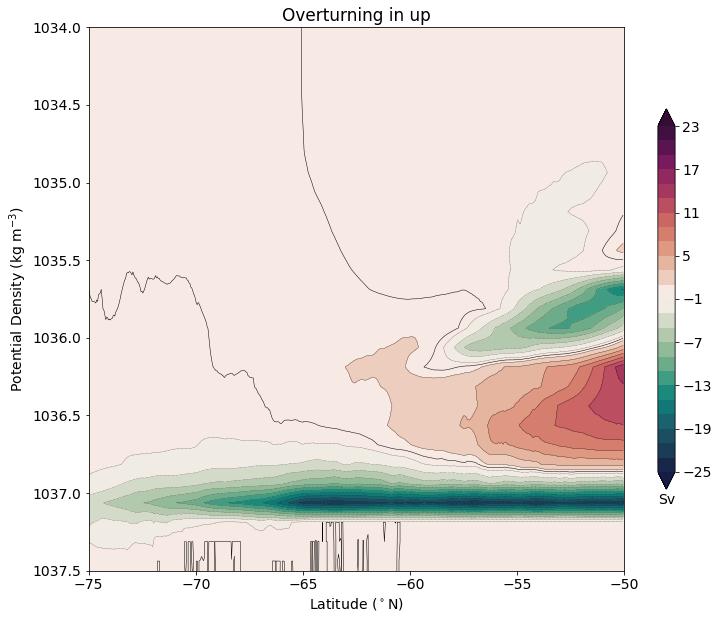

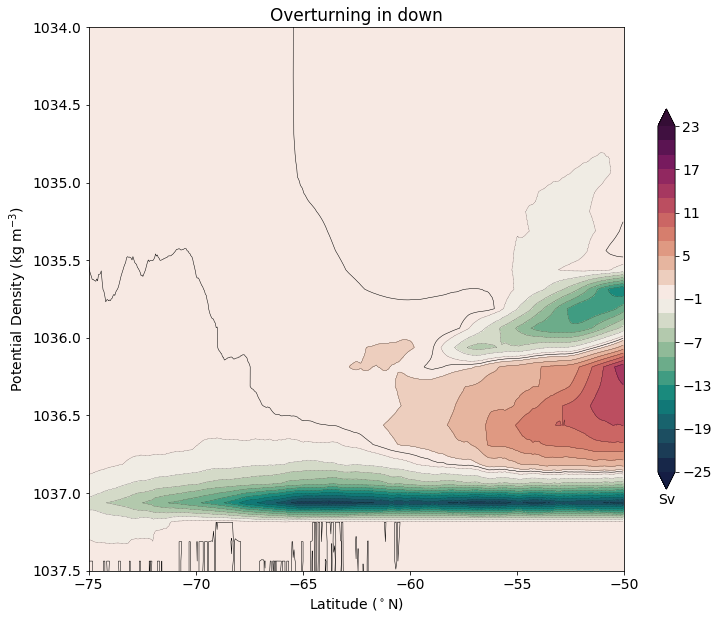

In [86]:
for k in ['ctrl', 'up', 'down']:
    plt.figure(figsize = (12, 10)) 
    plt.contourf(psi_overturning[k]['grid_yu_ocean'], psi_overturning[k]['potrho'], psi_overturning[k].sel(time = slice('2160-01-01', '2164-12-31')).mean('time'), 
                 cmap = cmocean.cm.curl, levels = np.arange(-25,25,2), extend='both')
    cb = plt.colorbar(orientation='vertical', shrink = 0.7)
    cb.ax.set_xlabel('Sv')
    
    plt.contour(psi_overturning[k]['grid_yu_ocean'], psi_overturning[k]['potrho'], psi_overturning[k].sel(time = slice('2160-01-01', '2164-12-31')).mean('time'),
                levels = np.arange(-25,25,2), colors = 'k', linewidths = 0.25)
    plt.contour(psi_overturning[k]['grid_yu_ocean'], psi_overturning[k]['potrho'], psi_overturning[k].sel(time = slice('2160-01-01', '2164-12-31')).mean('time'), 
                levels = [0.0,], colors = 'k', linewidths = 0.5)
    plt.gca().invert_yaxis()
    plt.ylim((1037.5,1034))
    plt.ylabel('Potential Density (kg m$^{-3}$)')
    plt.xlabel('Latitude ($^\circ$N)')
    plt.xlim([-75, -50])
    plt.title('Overturning in '+k);
    plt.savefig(figdir+'overturning_'+k+'.jpg', bbox_inches = 'tight')

In [ ]:
for k in ['up', 'down']:
    plt.figure(figsize = (12, 10)) 
    plt.contourf(psi_overturning[k]['grid_yu_ocean'], psi_overturning[k]['potrho'], 
                 psi_overturning[k].sel(time = slice('2160-01-01', '2164-12-31')).mean('time') - psi_overturning['ctrl'].sel(time = slice('2160-01-01', '2164-12-31')).mean('time'), 
                 cmap = cmocean.cm.balance, levels = np.arange(-2, 2.1, .1), extend='both')
    cb = plt.colorbar(orientation='vertical', shrink = 0.7)
    cb.ax.set_xlabel('Sv')
    
    plt.contour(psi_overturning[k]['grid_yu_ocean'], psi_overturning[k]['potrho'], 
                psi_overturning[k].sel(time = slice('2160-01-01', '2164-12-31')).mean('time') - psi_overturning['ctrl'].sel(time = slice('2160-01-01', '2164-12-31')).mean('time'),
                levels = np.arange(-2,2.2,.2), colors = 'k', linewidths = 0.25)
    plt.gca().invert_yaxis()
    plt.ylim((1037.5,1034))
    plt.ylabel('Potential Density (kg m$^{-3}$)')
    plt.xlabel('Latitude ($^\circ$N)')
    plt.xlim([-75, -50])
    plt.title('Overturning in '+k);
    plt.savefig(figdir+'overturning_anom_'+k+'.jpg', bbox_inches = 'tight')